<a href="https://colab.research.google.com/github/Uma1709/intership/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import pandas_datareader as pdr

%matplotlib inline

In [2]:
!pip install yfinance
import yfinance as yf

# Define the ticker symbol
ticker = 'TSLA'

# Retrieve the data
df_tesla = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [3]:
df_tesla


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300
2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500


In [4]:
df_tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300
2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95559000


In [7]:
df_tesla.dropna(axis=0,inplace=True)
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2010-06-29 to 2023-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3291 non-null   float64
 1   High       3291 non-null   float64
 2   Low        3291 non-null   float64
 3   Close      3291 non-null   float64
 4   Adj Close  3291 non-null   float64
 5   Volume     3291 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 180.0 KB


In [8]:
df_tesla=df_tesla.reset_index()
df_tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3286,2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300
3287,2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100
3288,2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
3289,2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300


<Axes: xlabel='Date'>

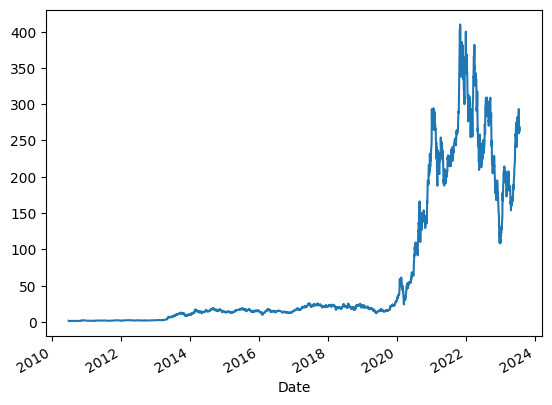

In [9]:
df_tesla=df_tesla.set_index('Date',drop=True)
df_tesla['Close'].plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1]<=0.05:
        print("reject null hypothesis,strong evi against null hypo, has unit root<1, stat")
    else:
        print("reject alternate hypothesis, weak evi against null hypo, has unit root=1,non stat")

In [13]:
adf_test(df_tesla['Open'])


ADF Statistics: -0.7684241332785609
p- value: 0.8282217675857944
reject alternate hypothesis, weak evi against null hypo, has unit root=1,non stat


In [14]:
df_tesla['First Diff']=df_tesla['Open']-df_tesla['Open'].shift(1)

In [15]:
adf_test(df_tesla['First Diff'].dropna())

ADF Statistics: -10.98758704656289
p- value: 7.19397651832145e-20
reject null hypothesis,strong evi against null hypo, has unit root<1, stat


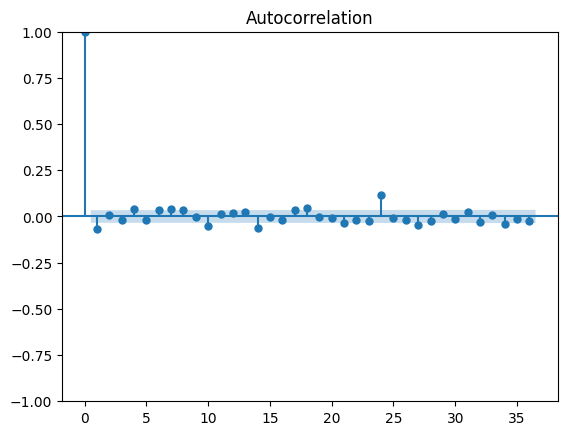

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_tesla['First Diff'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


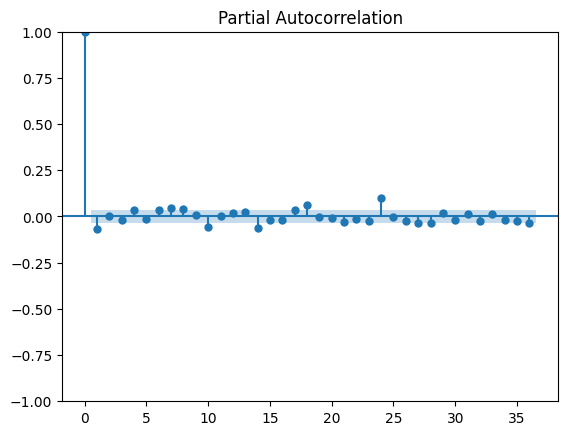

In [17]:
pacf = plot_pacf(df_tesla['First Diff'].dropna())

In [18]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300,-16.480011
2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100,-11.559998
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500,-12.149994


In [19]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,10,11)
test_dataset_end=datetime(2022,11,11)
train_data=df_tesla[:train_dataset_end]
test_data=df_tesla[train_dataset_end+timedelta(days=1):test_dataset_end]
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
test_data


,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000,4.426666
2021-10-13,270.156677,271.803345,268.593323,270.359985,270.359985,42360300,3.180023
2021-10-14,271.829987,273.416656,271.116669,272.773346,272.773346,36741600,1.673309
2021-10-15,274.579987,281.070007,274.116669,281.010010,281.010010,56773800,2.750000
2021-10-18,283.929993,291.753326,283.823334,290.036682,290.036682,72621600,9.350006
...,...,...,...,...,...,...,...
2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500,-13.950012
2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400,-14.629990
2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700,-3.240005


In [20]:
train_data

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,-3.899994
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,-2.866669
2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400,3.086670


In [21]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(train_data['Open'],order=(6,1,4))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
model_fit=model_Arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2842
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -6780.209
Date:                Thu, 27 Jul 2023   AIC                          13582.417
Time:                        04:35:29   BIC                          13647.888
Sample:                             0   HQIC                         13606.032
                               - 2842                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3441      0.013     26.149      0.000       0.318       0.370
ar.L2         -0.4045      0.015    -26.895      0.000      -0.434      -0.375
ar.L3          0.2978      0.013     22.307      0.000       0.272       0.324
ar.L4         -0.8762      0.011    -80.882      0.000      -0.897      -0.855
ar.L5         -0.0733      0.009     -8.063      0.000      -0.091      -0.055
ar.L6          0.0079      0.008      0.989      0.323      -0.008       0.023
ma.L1         -0.4205      0.010    -40.411      0.000      -0.441      -0.400
ma.L2          0.3481      0.012     29.037      0.000       0.325       0.372
ma.L3         -0.2767      0.012    -23.803      0.000      -0.300      -0.254
ma.L4          0.8824      0.009     97.531      0.000       0.865       0.900
sigma2         6.9275      0.047    146.235      0.000       6.835       7.020
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            131159.87
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):             369.70   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

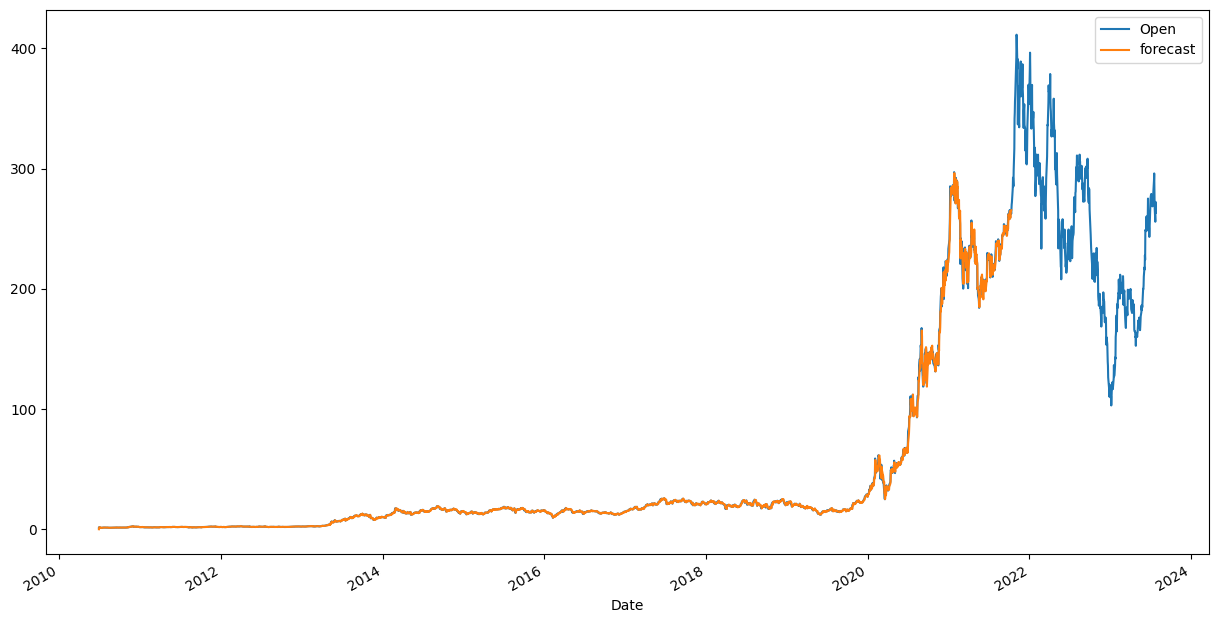

In [24]:
df_tesla['forecast']=model_fit.predict()
df_tesla[['Open','forecast']].plot(figsize=(15,8))

In [25]:
df_tesla.drop(['forecast'],axis=1)

,Open,High,Low,Close,Adj Close,Volume,First Diff
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.452666
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.052666
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.133334
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.200000
...,...,...,...,...,...,...,...
2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300,-16.480011
2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100,-11.559998
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500,-12.149994


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(train_data['Open'],order=(1,1,1),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

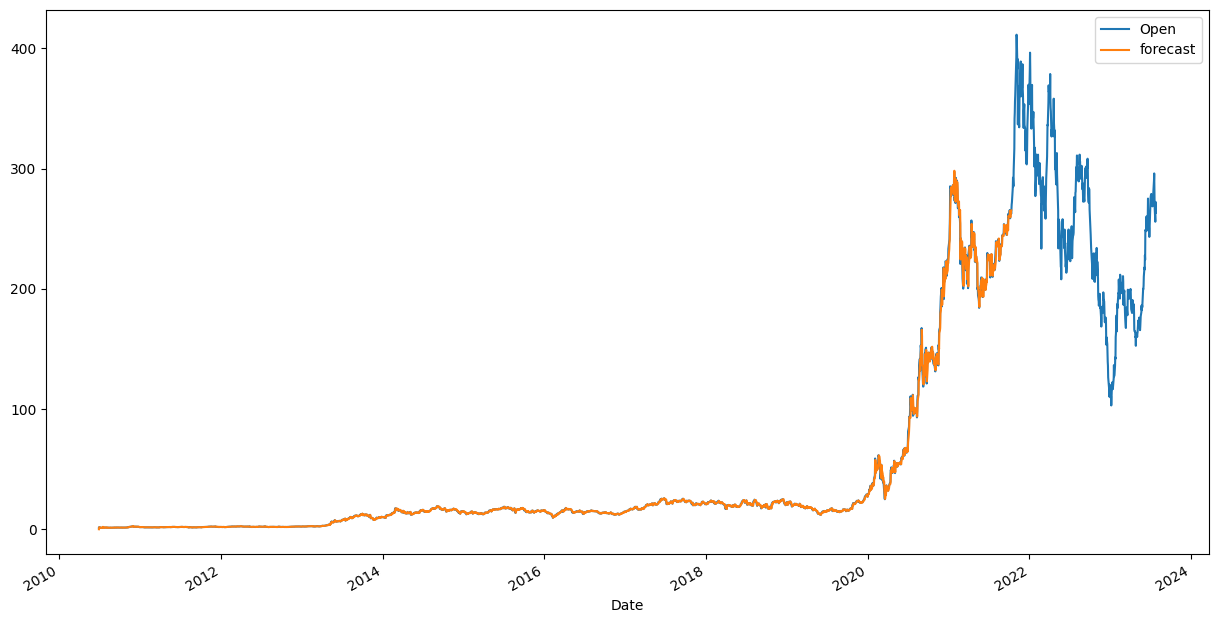

In [27]:
results=model_sarima.fit()
df_tesla['forecast']=results.predict()
df_tesla[['Open','forecast']].plot(figsize=(15,8))

In [28]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_tesla.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-08-26 00:00:00'),
 Timestamp('2023-09-26 00:00:00'),
 Timestamp('2023-10-26 00:00:00'),
 Timestamp('2023-11-26 00:00:00'),
 Timestamp('2023-12-26 00:00:00'),
 Timestamp('2024-01-26 00:00:00'),
 Timestamp('2024-02-26 00:00:00'),
 Timestamp('2024-03-26 00:00:00'),
 Timestamp('2024-04-26 00:00:00'),
 Timestamp('2024-05-26 00:00:00'),
 Timestamp('2024-06-26 00:00:00'),
 Timestamp('2024-07-26 00:00:00'),
 Timestamp('2024-08-26 00:00:00'),
 Timestamp('2024-09-26 00:00:00'),
 Timestamp('2024-10-26 00:00:00'),
 Timestamp('2024-11-26 00:00:00'),
 Timestamp('2024-12-26 00:00:00'),
 Timestamp('2025-01-26 00:00:00'),
 Timestamp('2025-02-26 00:00:00'),
 Timestamp('2025-03-26 00:00:00'),
 Timestamp('2025-04-26 00:00:00'),
 Timestamp('2025-05-26 00:00:00'),
 Timestamp('2025-06-26 00:00:00')]

In [29]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_tesla.columns)
future_datest_df.tail()

,Open,High,Low,Close,Adj Close,Volume,First Diff,forecast
2025-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_tesla.columns)
future_datest_df.tail()

,Open,High,Low,Close,Adj Close,Volume,First Diff,forecast
2025-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_tesla.columns)
future_datest_df.tail()

,Open,High,Low,Close,Adj Close,Volume,First Diff,forecast
2025-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
